# IE 360 HW2 

Ali Can Şahin 2018402189  

13/05/2022

## INTRODUCTION 

In this study the amount of sale for Unleaded gasoline. The given data consists of multiple independent variables as : 

UGS: Unleaded gasoline sale in a given quarter,
RNUV: An index indicating the rate of new unleaded gasoline using vehicles being added to the traffic in a quarter,
PU: Average price (adjusted with an index) of a liter of unleaded gasoline in a quarter,
PG: Average price (adjusted with an index) of a liter of diesel gasoline in a quarter,
NUGV: Number of unleaded gasoline using vehicles in the traffic,
NDGV: Number of diesel gasoline using vehicles in the traffic (per 1000 people),
GNPA: Agriculture component of Gross National Product (adjusted with an index),
GNPC: Commerce component of Gross National Product (adjusted with an index),
GNP: Grand total for GNP (agriculture, commerce and other components total).

Here it is tried to come up with an appropriate model that explains the relations between independent variables and gasoline sales. 
To do that, some new variables such as trend and seasonality are added, and data is redesigned. In the following subsections these steps will be shown

## DATA PREPERATION

In [6]:
library(ggplot2)
#install.packages("forecast")
library(forecast)


Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar
Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [2]:
setwd('C:/Users/alica/OneDrive/Masaüstü/ali belgeler/BOUN/3.Sınıf/2.DÖNEM/IE 360/HW2')
data = read.csv('IE360_Spring22_HW2_data.csv')
data
str(data)
data$Unleaded.Gasoline.Sale..UGS. = as.numeric(gsub(" ","",data$Unleaded.Gasoline.Sale..UGS.))
data$X..LPG.Vehicles..NLPG. = as.numeric(gsub(" ","",data$X..LPG.Vehicles..NLPG.))
data$X..Unleaded.Gasoline.Vehicles..NUGV. = as.numeric(gsub(" ","",data$X..Unleaded.Gasoline.Vehicles..NUGV.))
data$GNP.Agriculture = as.numeric(gsub(" ","",data$GNP.Agriculture))
data$GNP.Commerce = as.numeric(gsub(" ","",data$GNP.Commerce))
data$GNP.Total = as.numeric(gsub(" ","",data$GNP.Total))

data
str(data)

Quarter,Unleaded.Gasoline.Sale..UGS.,RNUV,X..LPG.Vehicles..NLPG.,Price.of.Unleaded.Gasoline..PU.,Price.of.Diesel.Gasoline..PG.,X..Unleaded.Gasoline.Vehicles..NUGV.,X..of.Diesel.Gasoline.Vehicles..NDGV.,GNP.Agriculture,GNP.Commerce,GNP.Total
2000_Q1,1 128 971,0.0146,940 000,469.03,355.69,4 647 500,281.9853,1 040 173,3 483 132,18 022 686
2000_Q2,1 199 569,0.0205,941 000,459.42,344.58,4 742 876,284.0813,1 760 460,4 525 451,21 797 130
2000_Q3,1 370 167,0.0207,943 500,439.98,327.21,4 840 931,286.7169,6 974 808,5 915 204,30 050 207
2000_Q4,1 127 548,0.0163,948 000,402.08,300.67,4 919 685,288.3137,3 267 125,4 929 778,24 480 153
2001_Q1,1 033 918,0.0071,950 000,411.58,305.75,4 954 754,287.6237,1 004 528,3 418 387,15 832 648
2001_Q2,1 019 754,0.0051,955 000,520.39,374.78,4 980 204,287.8814,1 449 357,4 359 831,20 296 918
2001_Q3,1 209 916,0.0041,967 500,530.37,398.71,5 000 446,287.5452,5 890 424,5 925 547,28 017 963
2001_Q4,1 002 789,0.0048,990 000,496.35,370.70,5 024 693,286.9786,1 940 854,4 559 190,22 656 812
2002_Q1,893 722,0.0012,1 000 000,479.52,352.72,5 030 810,286.3783,832 953,3 374 849,18 393 446
2002_Q2,1 027 252,0.0032,1 001 000,506.36,373.44,5 046 960,286.0471,1 419 764,4 363 782,20 382 635


'data.frame':	32 obs. of  11 variables:
 $ Quarter                              : Factor w/ 32 levels "2000_Q1","2000_Q2",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Unleaded.Gasoline.Sale..UGS.         : Factor w/ 29 levels ""," 736 580",..: 25 27 29 24 20 18 28 17 11 19 ...
 $ RNUV                                 : num  0.0146 0.0205 0.0207 0.0163 0.0071 0.0051 0.0041 0.0048 0.0012 0.0032 ...
 $ X..LPG.Vehicles..NLPG.               : Factor w/ 32 levels " 940 000"," 941 000",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Price.of.Unleaded.Gasoline..PU.      : num  469 459 440 402 412 ...
 $ Price.of.Diesel.Gasoline..PG.        : num  356 345 327 301 306 ...
 $ X..Unleaded.Gasoline.Vehicles..NUGV. : Factor w/ 32 levels "4 647 500","4 742 876",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ X..of.Diesel.Gasoline.Vehicles..NDGV.: num  282 284 287 288 288 ...
 $ GNP.Agriculture                      : Factor w/ 32 levels " 832 953"," 841 604",..: 6 16 31 24 3 11 25 17 1 9 ...
 $ GNP.Commerce                         : Factor w/ 32 

Quarter,Unleaded.Gasoline.Sale..UGS.,RNUV,X..LPG.Vehicles..NLPG.,Price.of.Unleaded.Gasoline..PU.,Price.of.Diesel.Gasoline..PG.,X..Unleaded.Gasoline.Vehicles..NUGV.,X..of.Diesel.Gasoline.Vehicles..NDGV.,GNP.Agriculture,GNP.Commerce,GNP.Total
2000_Q1,1128971,0.0146,940000,469.03,355.69,4647500,281.9853,1040173,3483132,18022686
2000_Q2,1199569,0.0205,941000,459.42,344.58,4742876,284.0813,1760460,4525451,21797130
2000_Q3,1370167,0.0207,943500,439.98,327.21,4840931,286.7169,6974808,5915204,30050207
2000_Q4,1127548,0.0163,948000,402.08,300.67,4919685,288.3137,3267125,4929778,24480153
2001_Q1,1033918,0.0071,950000,411.58,305.75,4954754,287.6237,1004528,3418387,15832648
2001_Q2,1019754,0.0051,955000,520.39,374.78,4980204,287.8814,1449357,4359831,20296918
2001_Q3,1209916,0.0041,967500,530.37,398.71,5000446,287.5452,5890424,5925547,28017963
2001_Q4,1002789,0.0048,990000,496.35,370.70,5024693,286.9786,1940854,4559190,22656812
2002_Q1,893722,0.0012,1000000,479.52,352.72,5030810,286.3783,832953,3374849,18393446
2002_Q2,1027252,0.0032,1001000,506.36,373.44,5046960,286.0471,1419764,4363782,20382635


'data.frame':	32 obs. of  11 variables:
 $ Quarter                              : Factor w/ 32 levels "2000_Q1","2000_Q2",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Unleaded.Gasoline.Sale..UGS.         : num  1128971 1199569 1370167 1127548 1033918 ...
 $ RNUV                                 : num  0.0146 0.0205 0.0207 0.0163 0.0071 0.0051 0.0041 0.0048 0.0012 0.0032 ...
 $ X..LPG.Vehicles..NLPG.               : num  940000 941000 943500 948000 950000 ...
 $ Price.of.Unleaded.Gasoline..PU.      : num  469 459 440 402 412 ...
 $ Price.of.Diesel.Gasoline..PG.        : num  356 345 327 301 306 ...
 $ X..Unleaded.Gasoline.Vehicles..NUGV. : num  4647500 4742876 4840931 4919685 4954754 ...
 $ X..of.Diesel.Gasoline.Vehicles..NDGV.: num  282 284 287 288 288 ...
 $ GNP.Agriculture                      : num  1040173 1760460 6974808 3267125 1004528 ...
 $ GNP.Commerce                         : num  3483132 4525451 5915204 4929778 3418387 ...
 $ GNP.Total                            : num  18022686 21797130 

Here, numeric values are adjusted for the sake of goodness of the model. The spaces between numbers are removed and they are combined.

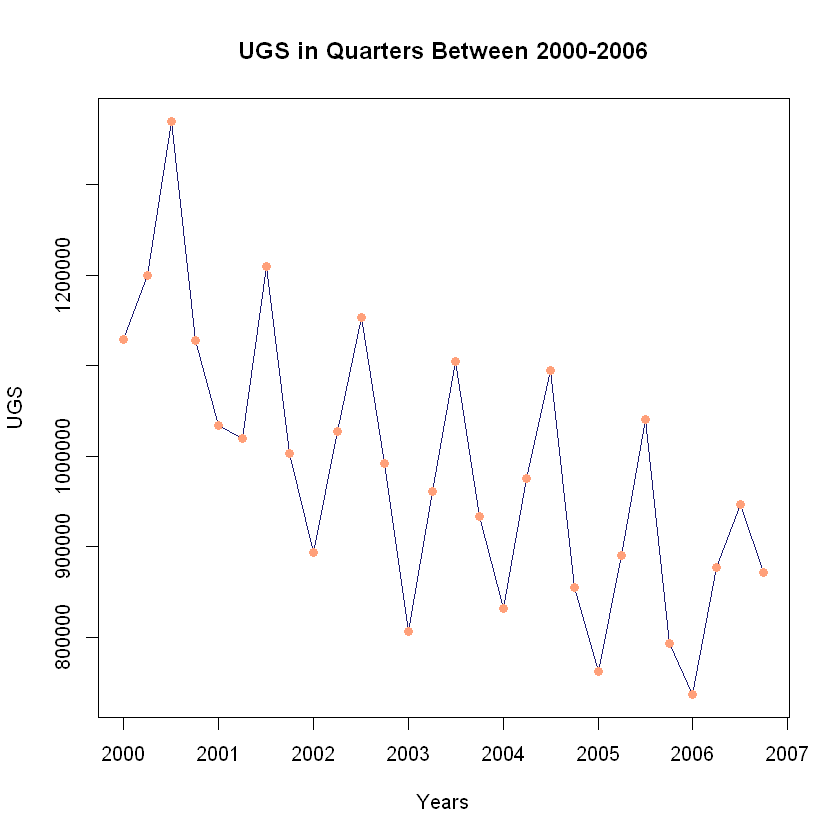

In [3]:
data_ts = ts(data[,c(2:10)],freq= 4,start = c(2000,1),end = c(2006,4))
ts.plot(data_ts[,'Unleaded.Gasoline.Sale..UGS.'],xlab = "Years",ylab = "UGS", main = "UGS in Quarters Between 2000-2006",col= rep("midnightblue",4))
ind = 2000 + c(0:27) / 4
points(ind,data$Unleaded.Gasoline.Sale..UGS.[1:28],col = "lightsalmon1",pch = 19)



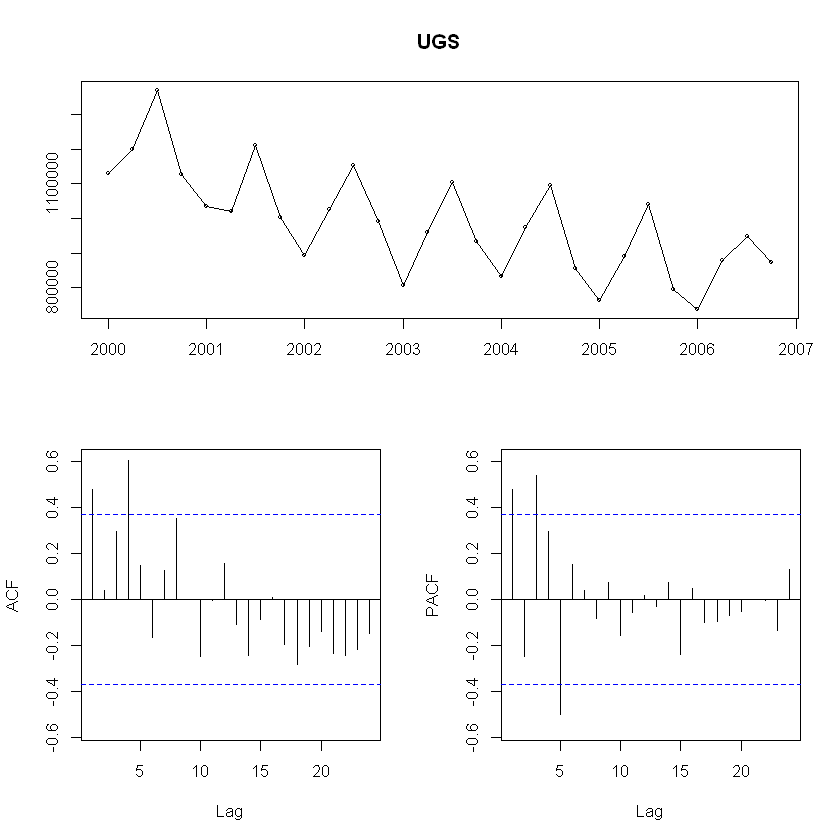

In [7]:
tsdisplay(data_ts[,1],lag.max = 24,main = 'UGS')


Here the UGS values are drawn with respect to dates. When the graph is examined it can be seen that variance do not change too much with respect to the time. It shows mostly a linear behaviour (expect for year 2000. After 2000, this behaviour is more apperent.). Therefore, any transformation wasn't performed. However, the mean of the values are changing with respect to time. It shows a decreasing behaviour. So, it can be said that there is a decreasing trend. Additionaly, our data shown seasonality in every 4 time period. Therefore, it can be said that our data is not stationary.

Addition to that, ACF functions proves the seasonality assumption. Although there is just one point exceeds the bounds, this point is lag4 and it is bigger than lag1. It is near to 1 which indicates the oerfect correlation.

Because of these observations, trend and seasonality components should be added to the model.

## Adding New Variables

In [8]:
data$trend = c(1:32)
data$seasons = as.factor(rep(c(1:4),8))
data
data_ts = ts(data[,c(2:13)],freq= 4,start = c(2000,1),end = c(2006,4))
data_ts


Quarter,Unleaded.Gasoline.Sale..UGS.,RNUV,X..LPG.Vehicles..NLPG.,Price.of.Unleaded.Gasoline..PU.,Price.of.Diesel.Gasoline..PG.,X..Unleaded.Gasoline.Vehicles..NUGV.,X..of.Diesel.Gasoline.Vehicles..NDGV.,GNP.Agriculture,GNP.Commerce,GNP.Total,trend,seasons
2000_Q1,1128971,0.0146,940000,469.03,355.69,4647500,281.9853,1040173,3483132,18022686,1,1
2000_Q2,1199569,0.0205,941000,459.42,344.58,4742876,284.0813,1760460,4525451,21797130,2,2
2000_Q3,1370167,0.0207,943500,439.98,327.21,4840931,286.7169,6974808,5915204,30050207,3,3
2000_Q4,1127548,0.0163,948000,402.08,300.67,4919685,288.3137,3267125,4929778,24480153,4,4
2001_Q1,1033918,0.0071,950000,411.58,305.75,4954754,287.6237,1004528,3418387,15832648,5,1
2001_Q2,1019754,0.0051,955000,520.39,374.78,4980204,287.8814,1449357,4359831,20296918,6,2
2001_Q3,1209916,0.0041,967500,530.37,398.71,5000446,287.5452,5890424,5925547,28017963,7,3
2001_Q4,1002789,0.0048,990000,496.35,370.70,5024693,286.9786,1940854,4559190,22656812,8,4
2002_Q1,893722,0.0012,1000000,479.52,352.72,5030810,286.3783,832953,3374849,18393446,9,1
2002_Q2,1027252,0.0032,1001000,506.36,373.44,5046960,286.0471,1419764,4363782,20382635,10,2


ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : biçimsel argüman "cols" birden çok gerçek argümanla eşleşti

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::

,Unleaded.Gasoline.Sale..UGS.,RNUV,X..LPG.Vehicles..NLPG.,Price.of.Unleaded.Gasoline..PU.,Price.of.Diesel.Gasoline..PG.,X..Unleaded.Gasoline.Vehicles..NUGV.,X..of.Diesel.Gasoline.Vehicles..NDGV.,GNP.Agriculture,GNP.Commerce,GNP.Total,trend,seasons
2000 Q1,1128971,0.0146,940000,469.03,355.69,4647500,281.9853,1040173,3483132,18022686,1,1
2000 Q2,1199569,0.0205,941000,459.42,344.58,4742876,284.0813,1760460,4525451,21797130,2,2
2000 Q3,1370167,0.0207,943500,439.98,327.21,4840931,286.7169,6974808,5915204,30050207,3,3
2000 Q4,1127548,0.0163,948000,402.08,300.67,4919685,288.3137,3267125,4929778,24480153,4,4
2001 Q1,1033918,0.0071,950000,411.58,305.75,4954754,287.6237,1004528,3418387,15832648,5,1
2001 Q2,1019754,0.0051,955000,520.39,374.78,4980204,287.8814,1449357,4359831,20296918,6,2
2001 Q3,1209916,0.0041,967500,530.37,398.71,5000446,287.5452,5890424,5925547,28017963,7,3
2001 Q4,1002789,0.0048,990000,496.35,370.70,5024693,286.9786,1940854,4559190,22656812,8,4
2002 Q1,893722,0.0012,1000000,479.52,352.72,5030810,286.3783,832953,3374849,18393446,9,1
2002 Q2,1027252,0.0032,1001000,506.36,373.44,5046960,286.0471,1419764,4363782,20382635,10,2


Here trend and seasonality variables are added. Next step is trying multiple models and coming up with one of the best.

## Multiple Models


Call:
lm(formula = Unleaded.Gasoline.Sale..UGS. ~ . + as.factor(seasons) - 
    seasons, data = data_ts)

Residuals:
   Min     1Q Median     3Q    Max 
-59869 -10668   2227  12576  32299 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)   
(Intercept)                            3.969e+06  1.007e+06   3.940  0.00148 **
RNUV                                   3.386e+06  2.201e+06   1.538  0.14624   
X..LPG.Vehicles..NLPG.                -6.013e-01  2.471e-01  -2.433  0.02895 * 
Price.of.Unleaded.Gasoline..PU.        1.407e+03  1.310e+03   1.074  0.30097   
Price.of.Diesel.Gasoline..PG.         -3.477e+03  2.018e+03  -1.723  0.10692   
X..Unleaded.Gasoline.Vehicles..NUGV.  -1.249e+00  3.709e-01  -3.368  0.00459 **
X..of.Diesel.Gasoline.Vehicles..NDGV.  1.393e+04  3.831e+03   3.635  0.00270 **
GNP.Agriculture                       -7.238e-02  4.191e-02  -1.727  0.10617   
GNP.Commerce                           1.104e-01  7.019e-02   1.573  0.1379

ERROR: Error in chol2inv(auxfit$qr$qr): 'size' nrow(x) = 28 i geçemez


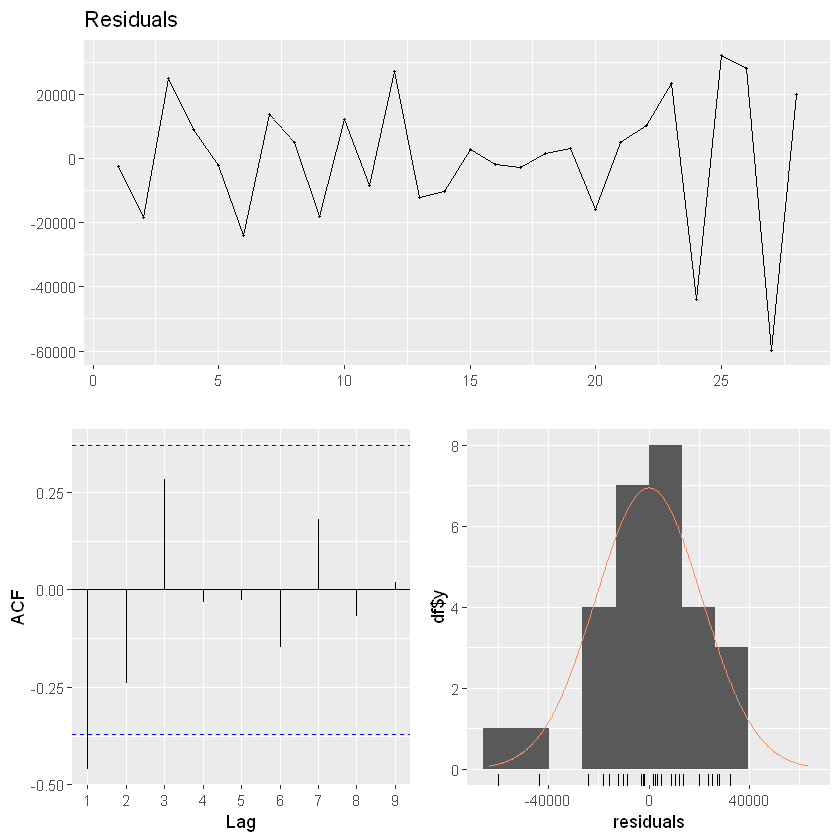

In [9]:
model = lm(Unleaded.Gasoline.Sale..UGS.~.  + as.factor(seasons) - seasons, data_ts)
summary(model)
checkresiduals(model)


Call:
lm(formula = Unleaded.Gasoline.Sale..UGS. ~ . + as.factor(seasons) - 
    RNUV - seasons, data = data_ts)

Residuals:
   Min     1Q Median     3Q    Max 
-60019 -11902   1502  17392  34450 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)   
(Intercept)                            3.212e+06  9.896e+05   3.245  0.00587 **
X..LPG.Vehicles..NLPG.                -3.502e-01  2.343e-01  -1.495  0.15713   
Price.of.Unleaded.Gasoline..PU.        1.997e+02  1.337e+03   0.149  0.88339   
Price.of.Diesel.Gasoline..PG.         -1.583e+03  1.964e+03  -0.806  0.43363   
X..Unleaded.Gasoline.Vehicles..NUGV.  -1.055e+00  3.952e-01  -2.670  0.01831 * 
X..of.Diesel.Gasoline.Vehicles..NDGV.  1.258e+04  4.165e+03   3.022  0.00914 **
GNP.Agriculture                       -5.100e-02  4.078e-02  -1.251  0.23158   
GNP.Commerce                           4.350e-02  6.979e-02   0.623  0.54309   
GNP.Total                             -2.253e-03  1.461e-02  -0.154 

ERROR: Error in chol2inv(auxfit$qr$qr): 'size' nrow(x) = 28 i geçemez


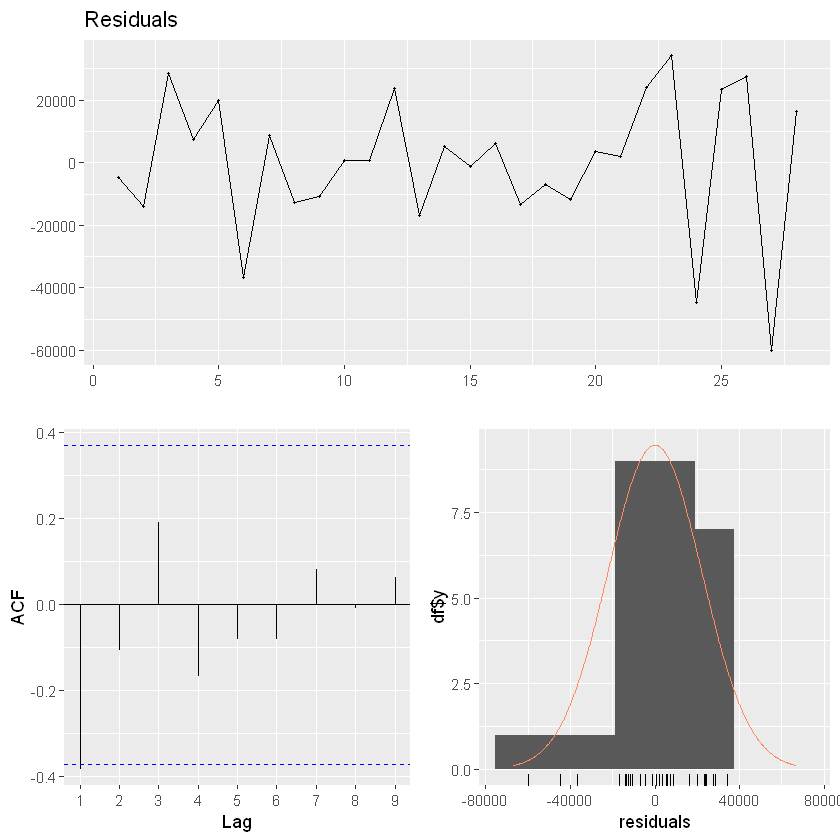

In [22]:
model = lm(Unleaded.Gasoline.Sale..UGS.~. +as.factor(seasons) -RNUV- seasons , data_ts)
summary(model)
checkresiduals(model)


Call:
lm(formula = Unleaded.Gasoline.Sale..UGS. ~ . + as.factor(seasons) - 
    RNUV - X..LPG.Vehicles..NLPG. - GNP.Agriculture - seasons - 
    GNP.Commerce - Unleaded.Gasoline.Sale..UGS., data = data_ts)

Residuals:
   Min     1Q Median     3Q    Max 
-60395 -11736    601  15793  55404 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            2.092e+06  6.163e+05   3.394 0.003236
Price.of.Unleaded.Gasoline..PU.       -9.275e+02  9.553e+02  -0.971 0.344454
Price.of.Diesel.Gasoline..PG.          5.561e+02  1.262e+03   0.441 0.664773
X..Unleaded.Gasoline.Vehicles..NUGV.  -5.773e-01  2.026e-01  -2.850 0.010637
X..of.Diesel.Gasoline.Vehicles..NDGV.  7.323e+03  1.885e+03   3.884 0.001087
GNP.Total                             -5.969e-03  9.641e-03  -0.619 0.543597
trend                                 -2.972e+03  6.167e+03  -0.482 0.635746
as.factor(seasons)2                    1.509e+05  3.438e+04   4.390 0.000353
a


	Breusch-Godfrey test for serial correlation of order up to 13

data:  Residuals
LM test = 23.966, df = 13, p-value = 0.03144


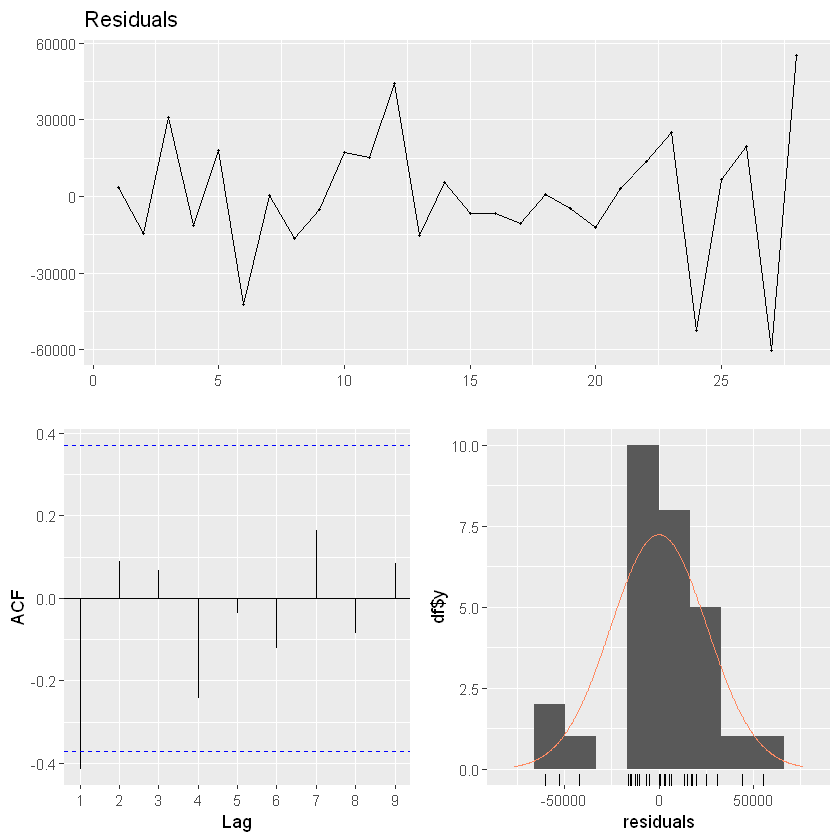

In [11]:
model = lm(Unleaded.Gasoline.Sale..UGS.~. + as.factor(seasons) -RNUV-X..LPG.Vehicles..NLPG. -GNP.Agriculture-seasons -GNP.Commerce - Unleaded.Gasoline.Sale..UGS. , data_ts)
summary(model)
checkresiduals(model)


Call:
lm(formula = Unleaded.Gasoline.Sale..UGS. ~ trend + Price.of.Unleaded.Gasoline..PU. + 
    X..Unleaded.Gasoline.Vehicles..NUGV. + X..of.Diesel.Gasoline.Vehicles..NDGV. + 
    as.factor(seasons), data = data_ts)

Residuals:
   Min     1Q Median     3Q    Max 
-60791 -13274    756  16273  55213 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            1.869e+06  4.103e+05   4.554 0.000193
trend                                 -4.941e+03  3.356e+03  -1.472 0.156576
Price.of.Unleaded.Gasoline..PU.       -5.142e+02  1.692e+02  -3.039 0.006474
X..Unleaded.Gasoline.Vehicles..NUGV.  -5.136e-01  1.349e-01  -3.807 0.001105
X..of.Diesel.Gasoline.Vehicles..NDGV.  6.680e+03  1.205e+03   5.545 1.99e-05
as.factor(seasons)2                    1.313e+05  1.626e+04   8.077 1.00e-07
as.factor(seasons)3                    2.890e+05  1.653e+04  17.484 1.38e-13
as.factor(seasons)4                    1.032e+05  1.682e+04   6.132


	Breusch-Godfrey test for serial correlation of order up to 11

data:  Residuals
LM test = 20.192, df = 11, p-value = 0.04278


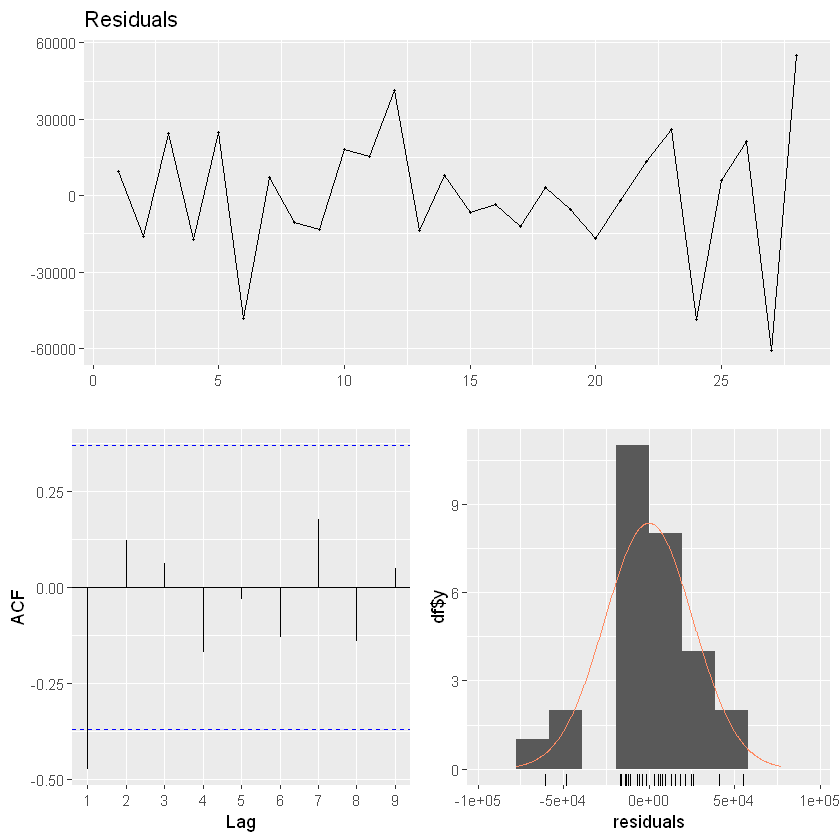

In [12]:
model = lm(Unleaded.Gasoline.Sale..UGS.~ trend +Price.of.Unleaded.Gasoline..PU.+X..Unleaded.Gasoline.Vehicles..NUGV.+X..of.Diesel.Gasoline.Vehicles..NDGV. + as.factor(seasons), data_ts )
summary(model)
checkresiduals(model)

Firstly, all variables are included in the model and then insignifacant variables are removed by one by until all variables are significant. When the adjusted R^2 values are commpared first and last models seems to be better. However, in the first model we do not have Brausch Godfrey test results from some reason. However, when the residual plot is examined it can be see that data are not around zero. So, the last model is chosen.

Last model has a disadvantage. Our residuals violate the normality assumption. Their mean seems like not zero. Therefore lagged_4 value is added to make the situaiton better.


In [23]:
data$lag_4 = c(0,0,0,0,model$residuals)

data_ts = ts(data[,c(2:14)],freq= 4,start = c(2000,1),end = c(2006,4))
data_ts


ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : biçimsel argüman "cols" birden çok gerçek argümanla eşleşti

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::

,Unleaded.Gasoline.Sale..UGS.,RNUV,X..LPG.Vehicles..NLPG.,Price.of.Unleaded.Gasoline..PU.,Price.of.Diesel.Gasoline..PG.,X..Unleaded.Gasoline.Vehicles..NUGV.,X..of.Diesel.Gasoline.Vehicles..NDGV.,GNP.Agriculture,GNP.Commerce,GNP.Total,trend,seasons,lag_4
2000 Q1,1128971,0.0146,940000,469.03,355.69,4647500,281.9853,1040173,3483132,18022686,1,1,0.0000
2000 Q2,1199569,0.0205,941000,459.42,344.58,4742876,284.0813,1760460,4525451,21797130,2,2,0.0000
2000 Q3,1370167,0.0207,943500,439.98,327.21,4840931,286.7169,6974808,5915204,30050207,3,3,0.0000
2000 Q4,1127548,0.0163,948000,402.08,300.67,4919685,288.3137,3267125,4929778,24480153,4,4,0.0000
2001 Q1,1033918,0.0071,950000,411.58,305.75,4954754,287.6237,1004528,3418387,15832648,5,1,-4562.7431
2001 Q2,1019754,0.0051,955000,520.39,374.78,4980204,287.8814,1449357,4359831,20296918,6,2,-13982.4099
2001 Q3,1209916,0.0041,967500,530.37,398.71,5000446,287.5452,5890424,5925547,28017963,7,3,28689.2856
2001 Q4,1002789,0.0048,990000,496.35,370.70,5024693,286.9786,1940854,4559190,22656812,8,4,7465.2015
2002 Q1,893722,0.0012,1000000,479.52,352.72,5030810,286.3783,832953,3374849,18393446,9,1,20021.8972
2002 Q2,1027252,0.0032,1001000,506.36,373.44,5046960,286.0471,1419764,4363782,20382635,10,2,-36580.9329



Call:
lm(formula = Unleaded.Gasoline.Sale..UGS. ~ trend + lag_4 + Price.of.Unleaded.Gasoline..PU. + 
    X..Unleaded.Gasoline.Vehicles..NUGV. + X..of.Diesel.Gasoline.Vehicles..NDGV. + 
    as.factor(seasons), data = data_ts)

Residuals:
   Min     1Q Median     3Q    Max 
-53847 -13771   2599  16104  43081 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            1.911e+06  4.099e+05   4.662  0.00017
trend                                 -4.627e+03  3.350e+03  -1.381  0.18327
lag_4                                 -3.562e-01  3.229e-01  -1.103  0.28374
Price.of.Unleaded.Gasoline..PU.       -5.735e+02  1.766e+02  -3.247  0.00425
X..Unleaded.Gasoline.Vehicles..NUGV.  -5.087e-01  1.343e-01  -3.789  0.00124
X..of.Diesel.Gasoline.Vehicles..NDGV.  6.536e+03  1.205e+03   5.422 3.12e-05
as.factor(seasons)2                    1.314e+05  1.617e+04   8.128 1.32e-07
as.factor(seasons)3                    2.936e+05  1.697e+04


	Breusch-Godfrey test for serial correlation of order up to 12

data:  Residuals
LM test = 20.583, df = 12, p-value = 0.05684


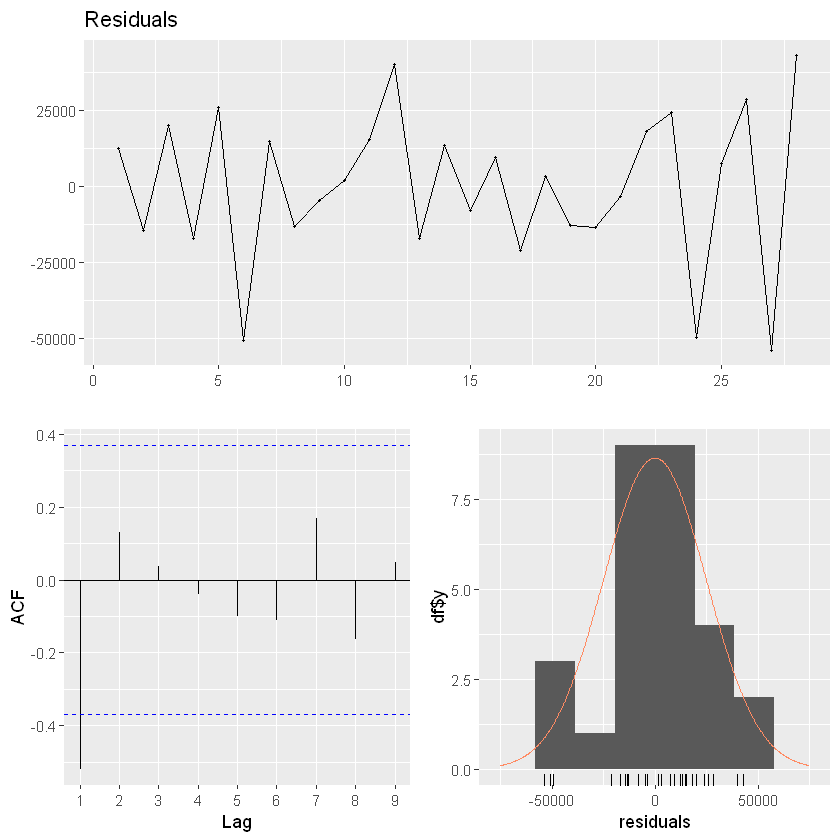

In [15]:
model = lm(Unleaded.Gasoline.Sale..UGS.~ trend +lag_4+ Price.of.Unleaded.Gasoline..PU.+X..Unleaded.Gasoline.Vehicles..NUGV.+X..of.Diesel.Gasoline.Vehicles..NDGV. + as.factor(seasons), data_ts )
summary(model)
checkresiduals(model)

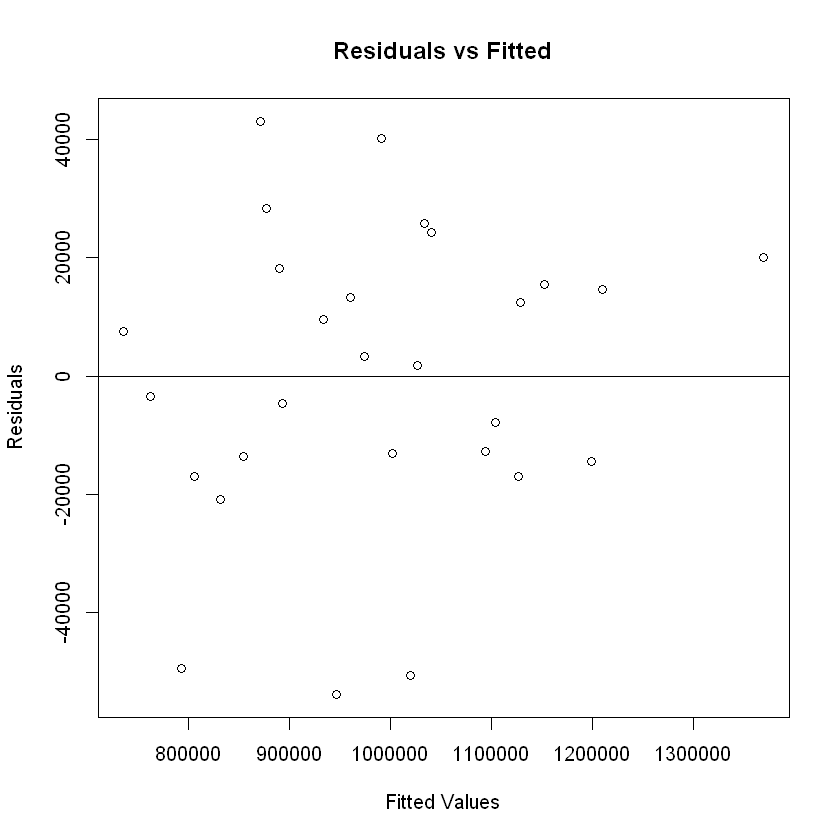

In [17]:
plot(data[1:28,2],model$residuals,xlab = 'Fitted Values', ylab = 'Residuals', main = 'Residuals vs Fitted')
abline(0,0)


Model is recalled. Here, the adj R^2 is improved and the Brausch Godfrey value is larger than 0.025 which indicates that null hypothesis is not rejected that assumes the residuals are not correlated. 

Also plots shows that ACF values are between determined bounds and the distribution of the residuals is close to the normal distribution.

## Prediction and Conclusion

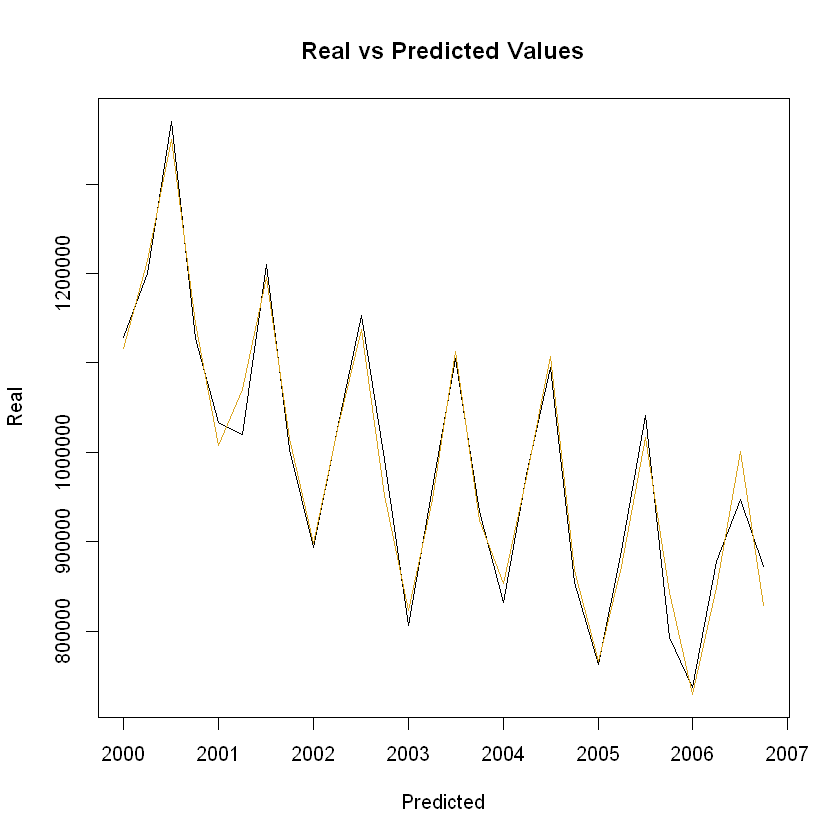

In [20]:
predicted2 = predict(model,data)
pre_re = ts(data.frame(real = data[,2],predicted = predicted2),freq = 4, start = c(2000,1),end = c(2006,4))
ts.plot(pre_re,col = c('black','goldenrod'),main = "Real vs Predicted Values",xlab = 'Predicted', ylab = 'Real')

When the real and predicted values are drawn it can be seen that model does a relatively good job. Here black curve shows real values and yellow curve shows predicted values for the known data. There are 2 different points that should be discussed. In 2006 data behaves in an unpredictable manner. Here, there can be some reasons that should be examined such government policies for countries. Also in the second quarter of 2001, there is a similar station. This situation should also be examined. 

Because we do not have enough data for these points the last model will be used for predictions.

Using the determined model, sales for 2007 are predicted in the following cell.

In [19]:
predicted = predict(model,data[29:32,])
predicted

29        30        31        32 
 701727.2  822452.0 1008219.8  769612.4